<a href="https://colab.research.google.com/github/Benjamin-Owusu/Stock_analysis/blob/main/Prospective_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Analysis in Python**

***In what follows below, we download a couple of stocks from Yahoo Finance, perform some basic statistical analysis and finally apply a simple trading strategy to ascertain which position to take on the stock (long or short positions)***

***The relevant libraries are loaded/imported below.***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
warnings.filterwarnings("ignore")

***The tickers for the relevant instruments are defined below. Here I considered 5 stocks namely; Apple, Iris (Iren), Google, Rolls Royce and Rheinmetall.***

In [ ]:
tickers = ["AAPL","IREN", "GOOGL","RR.L" , "RHM.DE" ]
df = yf.download(tickers, period="3y")["Close"]

[*********************100%***********************]  5 of 5 completed


***Bellow script displays the head (first 5 rows and all columns) of the data***

In [ ]:
df.head()

Ticker,AAPL,GOOGL,IREN,RHM.DE,RR.L
Date,,,,,
2022-09-12,160.890259,110.100632,4.67,152.513474,80.659981
2022-09-13,151.449280,103.605423,4.26,147.576508,78.260277
2022-09-14,152.896454,104.280762,4.48,142.881561,75.150665
2022-09-15,150.002151,102.205078,4.49,140.074249,76.850449
2022-09-16,148.358124,102.095848,5.06,139.783844,75.760582


***Below, I tried matching the ticker symbols to the names of the stocks (instruments) for easy identification***

In [ ]:
Instrument_names = ["Apple", "Google","Iren", "Rheinmetal", "Rolls Royce"]

for i, j in zip(df.columns, Instrument_names):
  print(f" {i:8s}| {j} ")

 AAPL    | Apple 
 GOOGL   | Google 
 IREN    | Iren 
 RHM.DE  | Rheinmetal 
 RR.L    | Rolls Royce 


***Below graph depicts the closing prices of the selected stocks. For all the 5 stocks, one can observe an upward sloping trend over the three year period. With the exception of AAPL, the upward trend in the last couple of months for the others have been very strong***


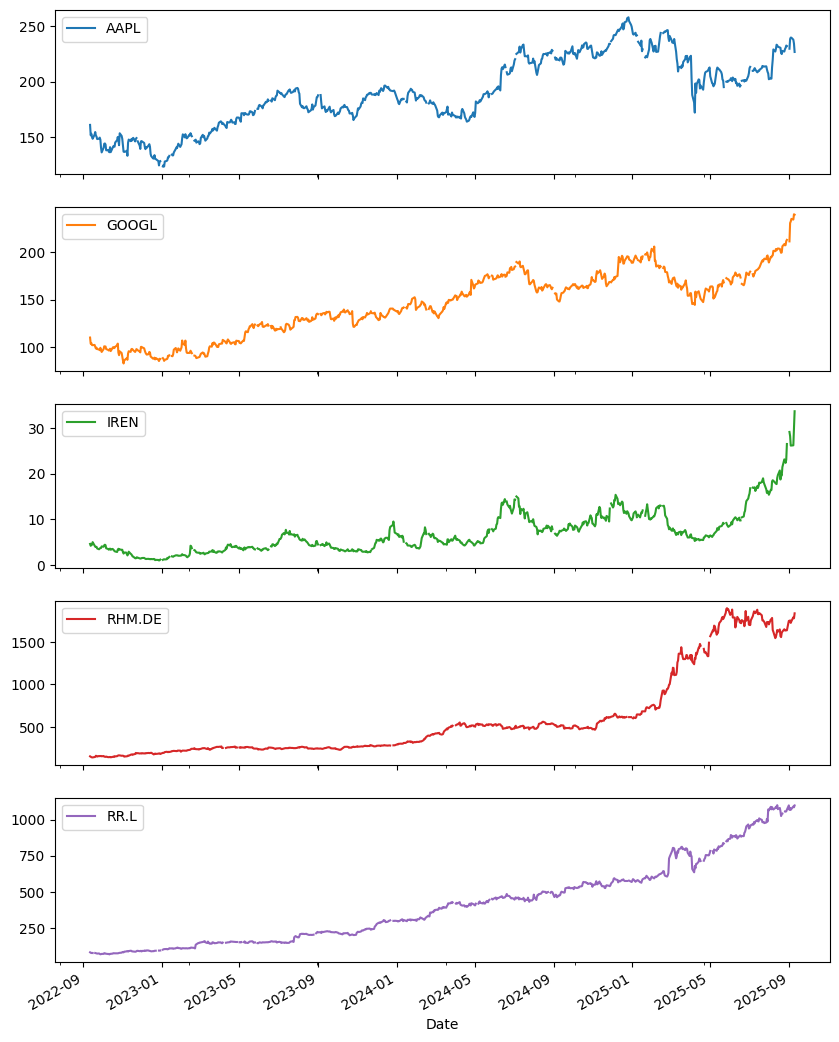

In [ ]:
df.plot(figsize = (10,14), subplots = True);

**The table below shows the pairwise Pearson correlation coefficients for the selected stocks. In almost all cases, a strong positive correlation can be observed.**

In [ ]:
df.corr().round(3)

Ticker,AAPL,GOOGL,IREN,RHM.DE,RR.L
Ticker,,,,,
AAPL,1.000,0.888,0.746,0.533,0.747
GOOGL,0.888,1.000,0.844,0.675,0.861
IREN,0.746,0.844,1.000,0.691,0.818
RHM.DE,0.533,0.675,0.691,1.000,0.935
RR.L,0.747,0.861,0.818,0.935,1.000


***In the scripts below, we compute the log returns for the stocks. Ideally, we are more interested in the returns of our investment***

In [ ]:
def log_p(x):
  return np.log(x) - np.log(x.shift(1))

data_r = log_p(df).dropna()
data_r.head()

Ticker,AAPL,GOOGL,IREN,RHM.DE,RR.L
Date,,,,,
2022-09-13,-0.060472,-0.060805,-0.091890,-0.032906,-0.030202
2022-09-14,0.009510,0.006497,0.050354,-0.032331,-0.040545
2022-09-15,-0.019111,-0.020106,0.002230,-0.019843,0.022366
2022-09-16,-0.011021,-0.001069,0.119514,-0.002075,-0.014283
2022-09-21,-0.020476,-0.018561,-0.014889,0.089308,-0.019982


***The table below shows a summary of the statistics of our daily stock returns. Rheinmetall and Rolls-Royce (defence stocks) have the highest daily stock returns comparatively. Iris is the stock with the most volatility (based on the standard deviation)***

In [ ]:
data_r.describe().T.round(5)

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,693.0,0.00085,0.01762,-0.09701,-0.00742,0.00163,0.00922,0.14262
GOOGL,693.0,0.00121,0.02028,-0.09992,-0.00962,0.00242,0.01157,0.09735
IREN,693.0,0.00152,0.07214,-0.27772,-0.04349,-0.00186,0.04186,0.51278
RHM.DE,693.0,0.00274,0.02461,-0.08327,-0.00827,0.00198,0.01570,0.12849
RR.L,693.0,0.00341,0.02435,-0.12400,-0.00829,0.00222,0.01487,0.21249


***Below provides the Pearson correlation coefficient for the stock returns.  This measures the pairwise linear correlation between the stocks. It can be observed that the correlation is mixed. For instance, Rheinmetall and Apple returns are negatively correlated, whilst Iris and Rolls-Royce are positively correlated. The coefficients are nevertheless not strong. Apple and Google have a fairly strongly correlated returns.***

In [ ]:
data_r.corr().round(3)

Ticker,AAPL,GOOGL,IREN,RHM.DE,RR.L
Ticker,,,,,
AAPL,1.000,0.546,0.272,-0.018,0.084
GOOGL,0.546,1.000,0.320,0.023,0.126
IREN,0.272,0.320,1.000,-0.007,0.102
RHM.DE,-0.018,0.023,-0.007,1.000,0.263
RR.L,0.084,0.126,0.102,0.263,1.000


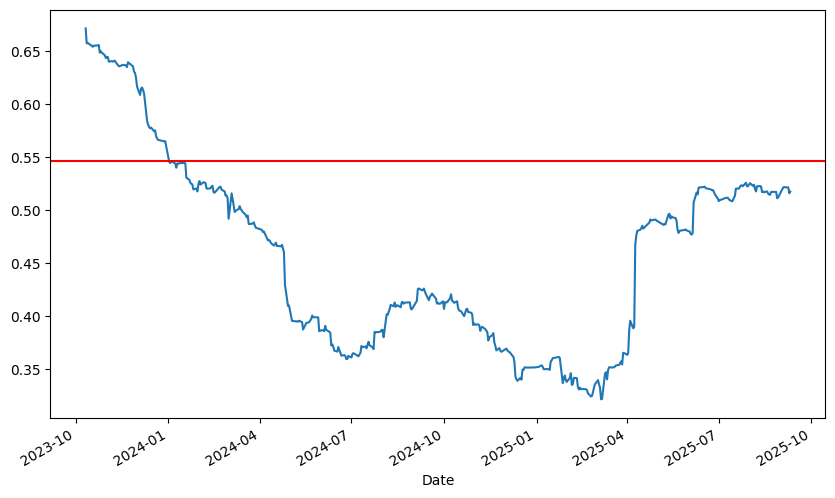

In [ ]:
ax  = data_r["AAPL"].rolling(window = 252).corr(data_r["GOOGL"]).plot(figsize = (10,6))
ax.axhline(data_r.corr().iloc[0,1], c = "r");

***The graph above plots the rolling correlation as a time series. Blue Line: The rolling (1-year) correlation between AAPL and GOOGL returns.
Around late 2023, correlation was quite high (~0.66).
It then steadily dropped throughout 2024, reaching a low of ~0.33 in early 2025. In mid-2025, it recovered somewhat, fluctuating between 0.45 and 0.50.
Red Horizontal Line: The average correlation between AAPL and GOOGL over the entire dataset (0.55).
This acts as a benchmark: when the blue line is above it, Apple and Google are moving more similarly than average; when below, they’re less correlated than average.
AAPL and GOOGL are positively correlated, but the strength of that correlation changes over time.
Recently (2024–2025), their correlation has been weaker than the historical average, suggesting that the two stocks’ returns are moving more independently compared to earlier periods.***

***Next, we consider a non-linear correlation measure known as the "Kendall" as an alternative. This is based on a rank correlation. Further information regarding the intuition for the correlation types can be found from https://library.virginia.edu/data/articles/correlation-pearson-spearman-and-kendalls-tau***

In [ ]:
data_r.corr(method = "kendall").round(3)

Ticker,AAPL,GOOGL,IREN,RHM.DE,RR.L
Ticker,,,,,
AAPL,1.000,0.371,0.176,0.007,0.055
GOOGL,0.371,1.000,0.239,0.008,0.079
IREN,0.176,0.239,1.000,0.007,0.099
RHM.DE,0.007,0.008,0.007,1.000,0.227
RR.L,0.055,0.079,0.099,0.227,1.000


***From the below graphs, it can be observed that the cummulative daily returns are upward sloping and positive on avearge. Rolls-royce and Rheinmetall delivered over 100% returns over the three-year period. Apple and Google returns are about 50% whilst Iris returns is also remarkable (close to 100%)***

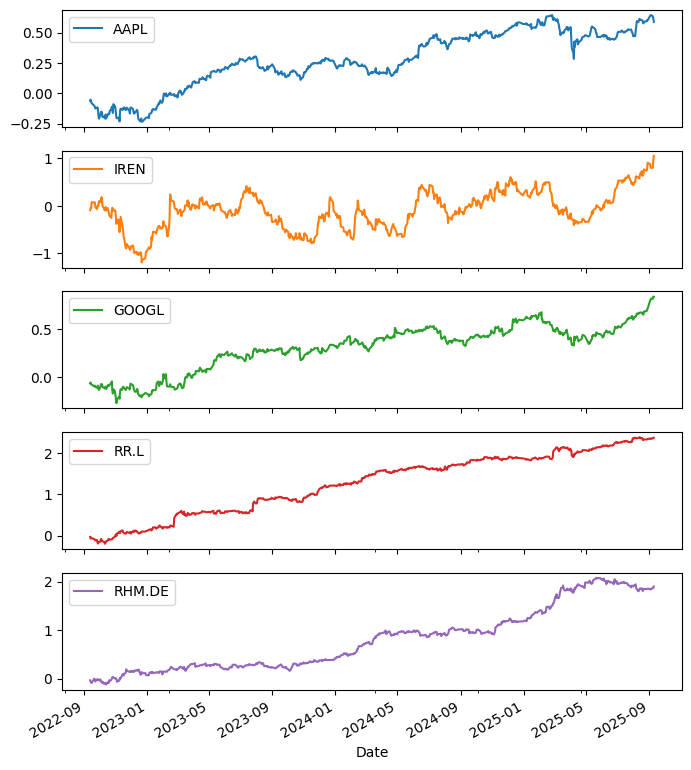

In [ ]:
data_r[["AAPL","IREN", "GOOGL","RR.L" , "RHM.DE"]].cumsum().plot(figsize = (8,10), subplots = True);

***In the script below (function), I implemented a simple strategy based on moving averages of the stocks, namely, short-term (SMA-S) and long-term moving averages (SMA-L). This is based on an old strategy that says "go long (buy) when the short term moving average exceed the long term moving avearge, and go short (sell) when the opposite holds. The rationale is that when the short-term moving average (SMA-S) is above the long-term moving average (SMA-L), it indicates that the current price has gained momentum. Therefore, it is reasonable to enter a long position in order to benefit from the potential increase in stock prices. This is also known as the "bullish signal". The opposite case is know as a "bearish" signal. For short term window, I defined 21 trading days which is equivalent to one month. for the long term, I chose close to 9 months.***

In [ ]:
def sma_strategy(df, short_window=21, long_window=200, plot_last=300):

    df = df.copy()

    # Detect ticker column (assume first numeric column)
    ticker_col = df.select_dtypes(include=[np.number]).columns[0]

    # Calculate moving averages
    df[f"SMA_S_{ticker_col}"] = df[ticker_col].rolling(window=short_window).mean()
    df[f"SMA_L_{ticker_col}"] = df[ticker_col].rolling(window=long_window).mean()

    # Drop NaN values
    df.dropna(inplace=True)

    # Generate trading signals
    df["strategy"] = np.where(df[f"SMA_S_{ticker_col}"] > df[f"SMA_L_{ticker_col}"], 1, -1)

    # Plot
    df[[ticker_col, f"SMA_S_{ticker_col}", f"SMA_L_{ticker_col}", "strategy"]].iloc[-plot_last:].plot(
        figsize=(12, 6), secondary_y="strategy"
    )
    plt.title(f"SMA Strategy on {ticker_col}")
    plt.show()

    return df

***After the application of  the above discussed strategy for Apple stocks, I provide a plot of the strategy. The strategy proposes a long situation (buy) based on the current price and the SMA-L and SMA-S.***


[*********************100%***********************]  1 of 1 completed


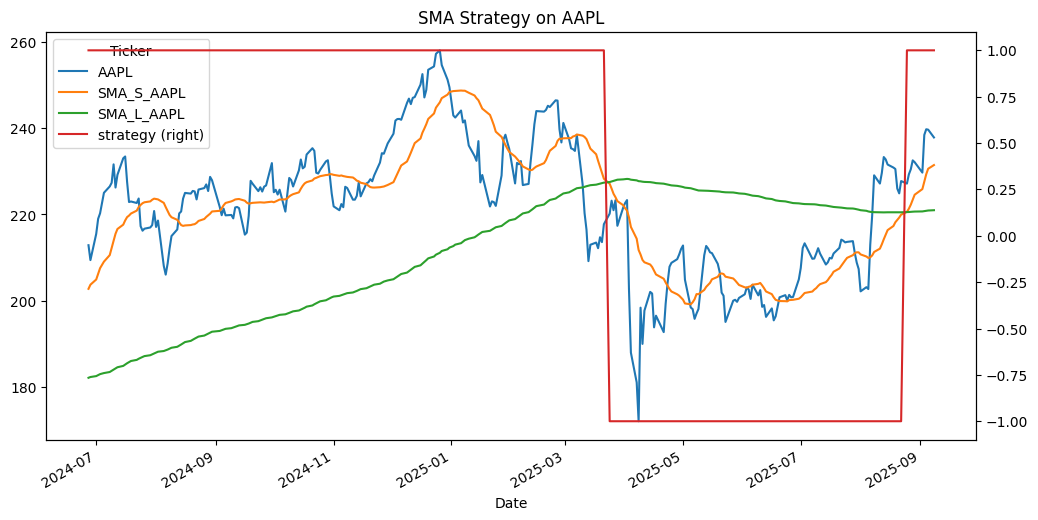

Ticker,AAPL,SMA_S_AAPL,SMA_L_AAPL,strategy
Date,,,,
2023-06-27,185.984680,180.232674,152.047388,1
2023-06-28,187.161545,180.883508,152.208573,1
2023-06-29,187.497787,181.462288,152.341611,1
2023-06-30,191.829483,182.249692,152.543511,1
2023-07-03,190.336121,182.832240,152.730710,1
...,...,...,...,...
2025-09-02,229.720001,225.891345,220.705828,1
2025-09-03,238.470001,227.574703,220.780994,1
2025-09-04,239.779999,229.340895,220.858276,1


In [ ]:
ticker_aapl= ["AAPL"]
df_aapl =  yf.download(ticker_aapl, period="3y")["Close"]

sma_strategy(df_aapl)

***Below depicts the graph after the application of the above-discussed strategy for Iris stocks. The strategy proposes a long situation (buy) based on the current price and the SMA-L and SMA-S.***

[*********************100%***********************]  1 of 1 completed


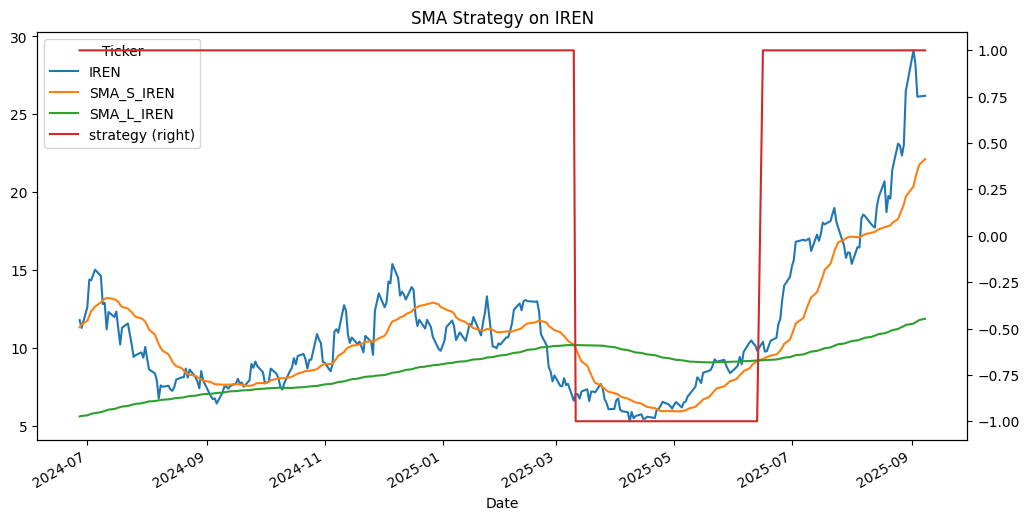

Ticker,IREN,SMA_S_IREN,SMA_L_IREN,strategy
Date,,,,
2023-06-27,4.480000,3.742381,2.956950,1
2023-06-28,4.380000,3.785714,2.955800,1
2023-06-29,4.760000,3.836667,2.956250,1
2023-06-30,4.660000,3.888571,2.958250,1
2023-07-03,5.660000,3.987619,2.964150,1
...,...,...,...,...
2025-09-02,29.110001,20.375238,11.566325,1
2025-09-03,28.209999,20.933810,11.645375,1
2025-09-04,26.129999,21.394762,11.721625,1


In [ ]:
ticker_Ir = ["Iren"]
df_Ir = yf.download(ticker_Ir, period="3y")["Close"]


sma_strategy(df_Ir)

## ***Danke Sehr***